In [3]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Literal
from math import sqrt

# Find Roots of Quadratic equation using Conditional Workflow

In [4]:
# State

class QuadraticState(TypedDict):
    a : int
    b : int
    c : int
    
    equation : str
    discriminant : float
    result: str

In [28]:
def show_equation(state : QuadraticState)-> QuadraticState:
    a = state["a"]
    b = state["b"]
    c = state["c"]

    equation = f"{a}x^2{f"+{b}" if b>=0 else b}x{f"+{c}" if c>=0 else c} = 0 "
    return {"equation": equation}

def calc_discriminant(state : QuadraticState)-> QuadraticState:
    """ b**2-(4*a*c)"""
    a = state["a"]
    b = state["b"]
    c = state["c"]

    discriminant = b**2 - (4*a*c)
    return {"discriminant":discriminant}

def no_real_roots(state : QuadraticState)-> QuadraticState:
    
    return {"result":"no real roots" }

def distinct_roots(state : QuadraticState)-> QuadraticState:
    a = state["a"]
    b = state["b"]
    d = state["discriminant"]
    r1 = ((-b+sqrt(d))/(2*a))
    r2 = ((-b-sqrt(d))/(2*a))      
    return {"result": f" Distinct Roots --> r1 : {r1}, r2:{r2}" }

def repeated_roots(state : QuadraticState)-> QuadraticState:
    a = state["a"]
    b = state["b"]
    r1 = (-b)/float(2*a)
          
    return {"result": f" Repeated Roots --> r : {r1}" }

    # Function that acts conditional router, it takes in
    # State & returns name of the correct node to branch
def check_condition(state: QuadraticState)-> Literal["distinct_roots","no_real_roots","repeated_roots"] :
    if state["discriminant"]>0:
        return "distinct_roots"
    elif state["discriminant"]<0:
        return "no_real_roots"
    else:
        return "repeated_roots"


def summarize(state : QuadraticState)-> QuadraticState:
    summary = f"SR : {state["strike_rate"]}, boundary_perc : {state['boundary_percent']}, bpb : {state['balls_per_boundary']}"
    
    state["summary"] = summary
    return state

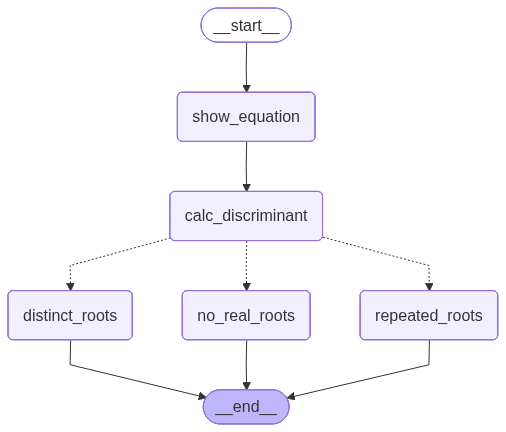

In [29]:
# Graph 

graph = StateGraph(state_schema= QuadraticState)

# Add Nodes
    # Sequential
graph.add_node("show_equation", show_equation)
graph.add_node("calc_discriminant", calc_discriminant)
    # Branching nodes
graph.add_node("no_real_roots", no_real_roots)
graph.add_node("distinct_roots", distinct_roots)
graph.add_node("repeated_roots", repeated_roots)


# Adding edges
    # Sequential
graph.add_edge(START, "show_equation")
graph.add_edge("show_equation", "calc_discriminant")

    # Adding Conditional edges
graph.add_conditional_edges("calc_discriminant", check_condition)

    # Branch ending edges (although 3, result comes through only 1)
graph.add_edge("no_real_roots", END)
graph.add_edge("distinct_roots", END)
graph.add_edge("repeated_roots", END)


workflow = graph.compile()
workflow

In [35]:

init_state = {
    "a": 1,
    "b": 4,
    "c": -12,
}
init_state

{'a': 1, 'b': 4, 'c': -12}

In [36]:
final_state = workflow.invoke(init_state)

# print(final_state["summary"])
final_state

{'a': 1,
 'b': 4,
 'c': -12,
 'equation': '1x^2+4x-12 = 0 ',
 'discriminant': 64,
 'result': ' Distinct Roots --> r1 : 2.0, r2:-6.0'}